## Steps:

1. Load the Heart Disease UCI dataset into a Pandas DataFrame. 
2. Handle missing values (imputation or removal). 
3. Perform data encoding (one-hot encoding for categorical variables). 
4. Standardize numerical features using MinMaxScaler or StandardScaler. 
5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, 
and boxplots.

## 1. Load the Heart Disease UCI dataset into a Pandas DataFrame. 

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# combine features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# save the dataset to a CSV file
data.to_csv('../data/heart_disease.csv', index=False)

In [2]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


### 1.1 Load the data 

In [3]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
documentation = {
    "categorical": {
        "cp": "Chest pain type (1-4)",
        "exang": "Exercise induced angina (1 = yes; 0 = no)",
        "thal": "Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)",
        "sex": "Sex (1 = male; 0 = female)",
        "ca": "Number of major vessels (0-3) colored by fluoroscopy",
        "fbs": "Fasting blood sugar > 120 mg/dl (1 = yes; 0 = no)",
        "restecg": "Resting electrocardiographic results (0-2)",
    },
    "numerical": {
        "age": "Age in years",
        "trestbps": "Resting blood pressure (in mm Hg)",
        "chol": "Serum cholesterol (in mg/dl)",
        "oldpeak": "Oldpeak (depression induced by exercise relative to rest)",
        "thalach": "Maximum heart rate achieved",
        "slope": "Slope of the peak exercise ST segment",
    }
}

### 1.2 Explore the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [8]:
# Modify the 'num' column to be binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

## 2. Handle missing values (imputation or removal). 


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

ca      4
thal    2
dtype: int64

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)
print("Missing values after dropping rows with NaN:", df.isnull().sum().sum())

Missing values after dropping rows with NaN: 0


## 3. Perform data encoding (one-hot encoding for categorical variables).

In [11]:
from sklearn.preprocessing import OneHotEncoder

Categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
for col in Categorical_columns:
    df[col] = df[col].astype('category')
    print(df[col].value_counts())
    print("="*30)

sex
1    201
0     96
Name: count, dtype: int64
cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64
fbs
0    254
1     43
Name: count, dtype: int64
restecg
0    147
2    146
1      4
Name: count, dtype: int64
exang
0    200
1     97
Name: count, dtype: int64
slope
1    139
2    137
3     21
Name: count, dtype: int64
thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64


#### Note: All categorical columns are already encoded.

In [12]:
df["thal"] = df["thal"].map({
    3: 1,
    6: 2,
    7: 3
})
df["thal"].value_counts()

thal
1    164
3    115
2     18
Name: count, dtype: int64

## 4. Standardize numerical features using MinMaxScaler or StandardScaler. 

In [13]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.drop("num", axis=1).select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,-0.721976,2,0
1,1.378929,1,4,1.596266,0.744555,0,2,-1.816334,1,0.381773,2,2.478425,1,1
2,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,1.411625,3,1
3,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,-0.721976,1,0
4,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,-0.721976,1,0


## 5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.

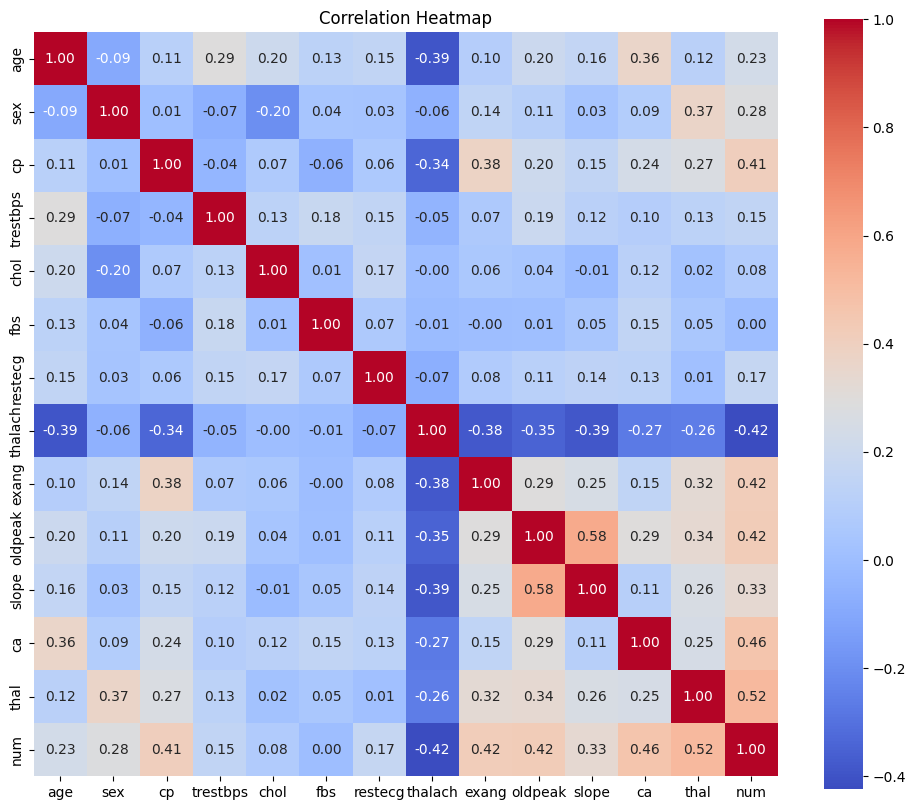

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

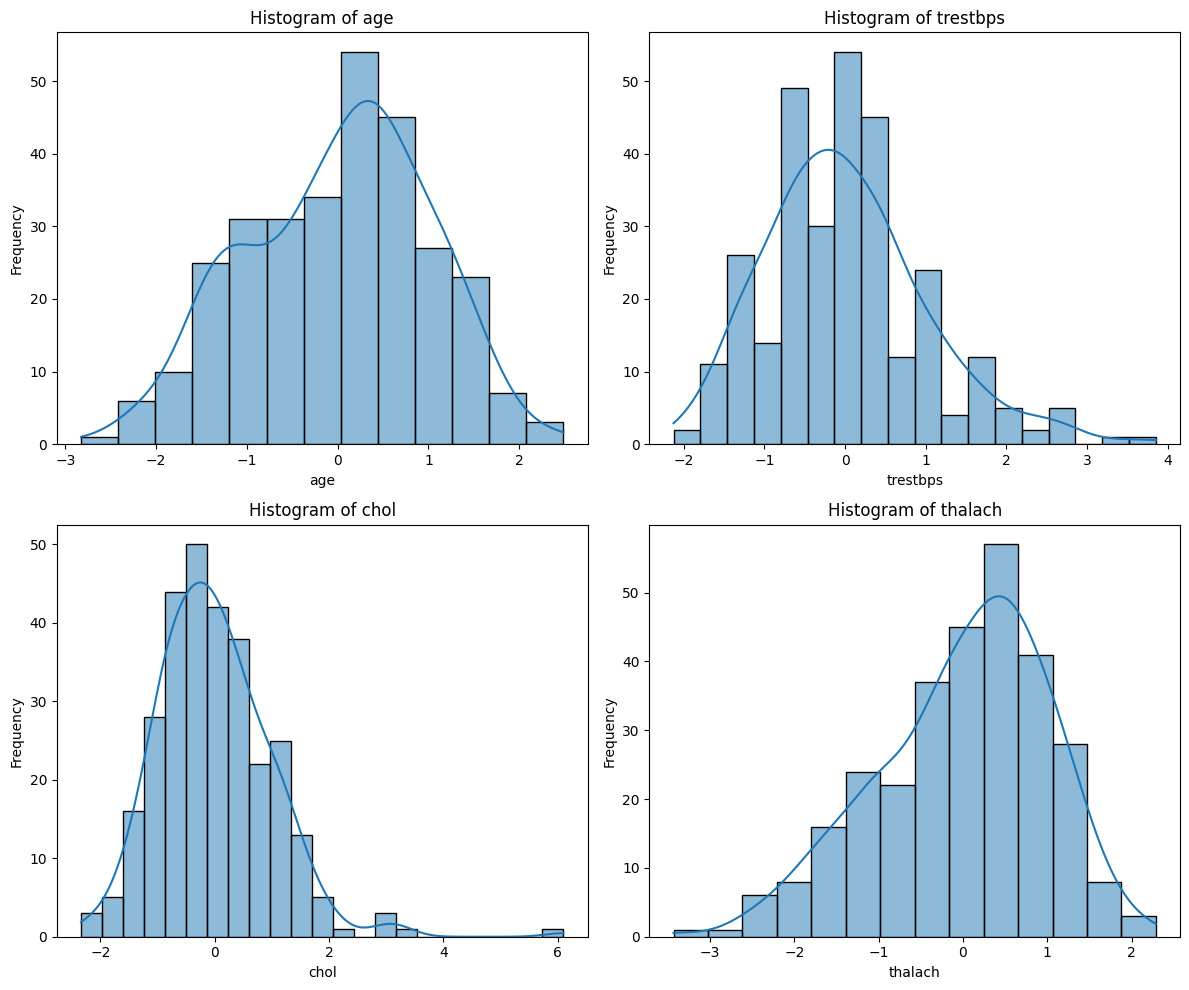

In [15]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

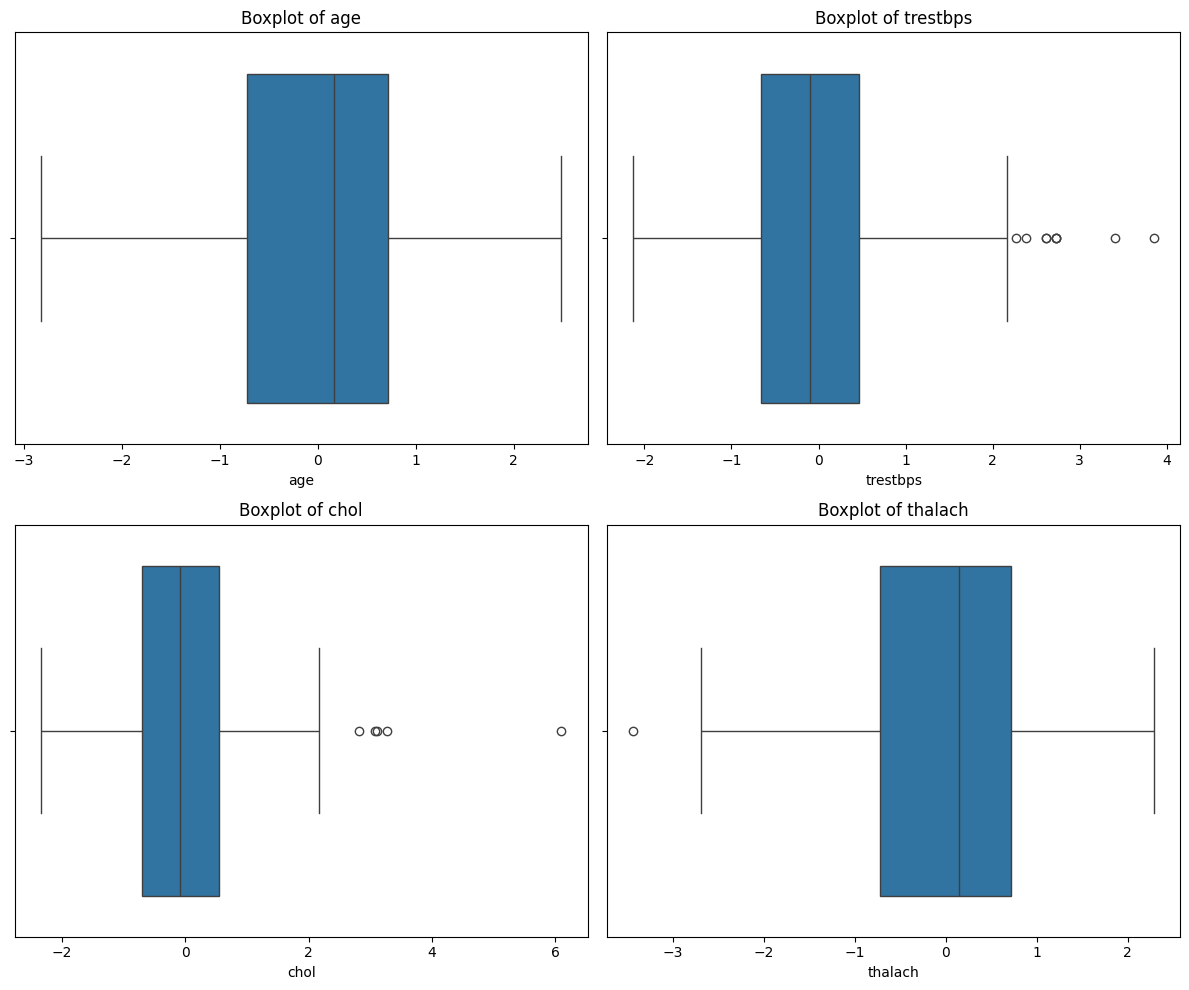

In [16]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

## Remove Outliers

In [17]:
# Calculate the IQR for the numerical features
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR
outlier_mask = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Remove outliers
df = df[~outlier_mask.any(axis=1)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       261 non-null    float64 
 1   sex       261 non-null    category
 2   cp        261 non-null    category
 3   trestbps  261 non-null    float64 
 4   chol      261 non-null    float64 
 5   fbs       261 non-null    category
 6   restecg   261 non-null    category
 7   thalach   261 non-null    float64 
 8   exang     261 non-null    category
 9   oldpeak   261 non-null    float64 
 10  slope     261 non-null    category
 11  ca        261 non-null    float64 
 12  thal      261 non-null    category
 13  num       261 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 19.0 KB


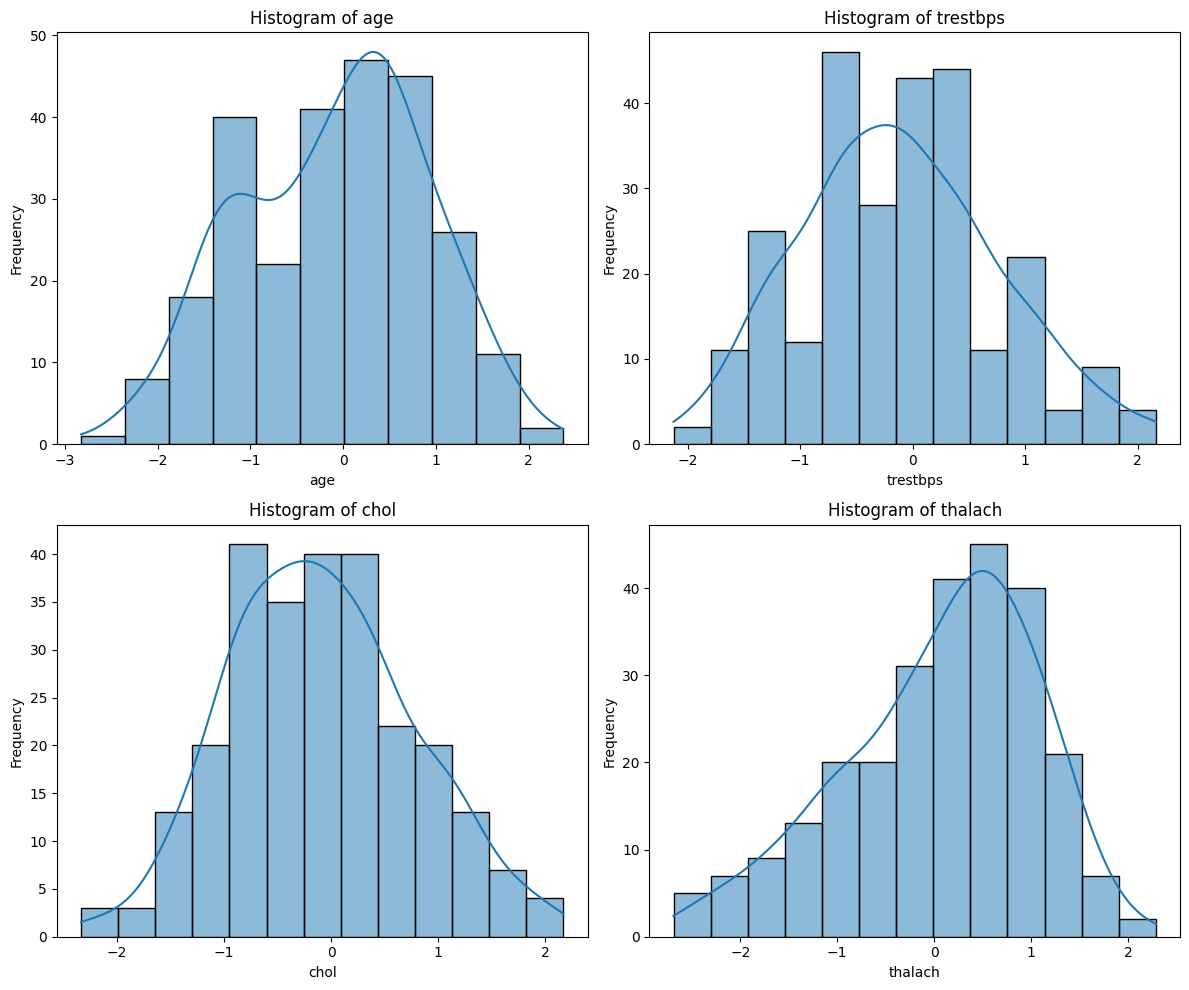

In [19]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

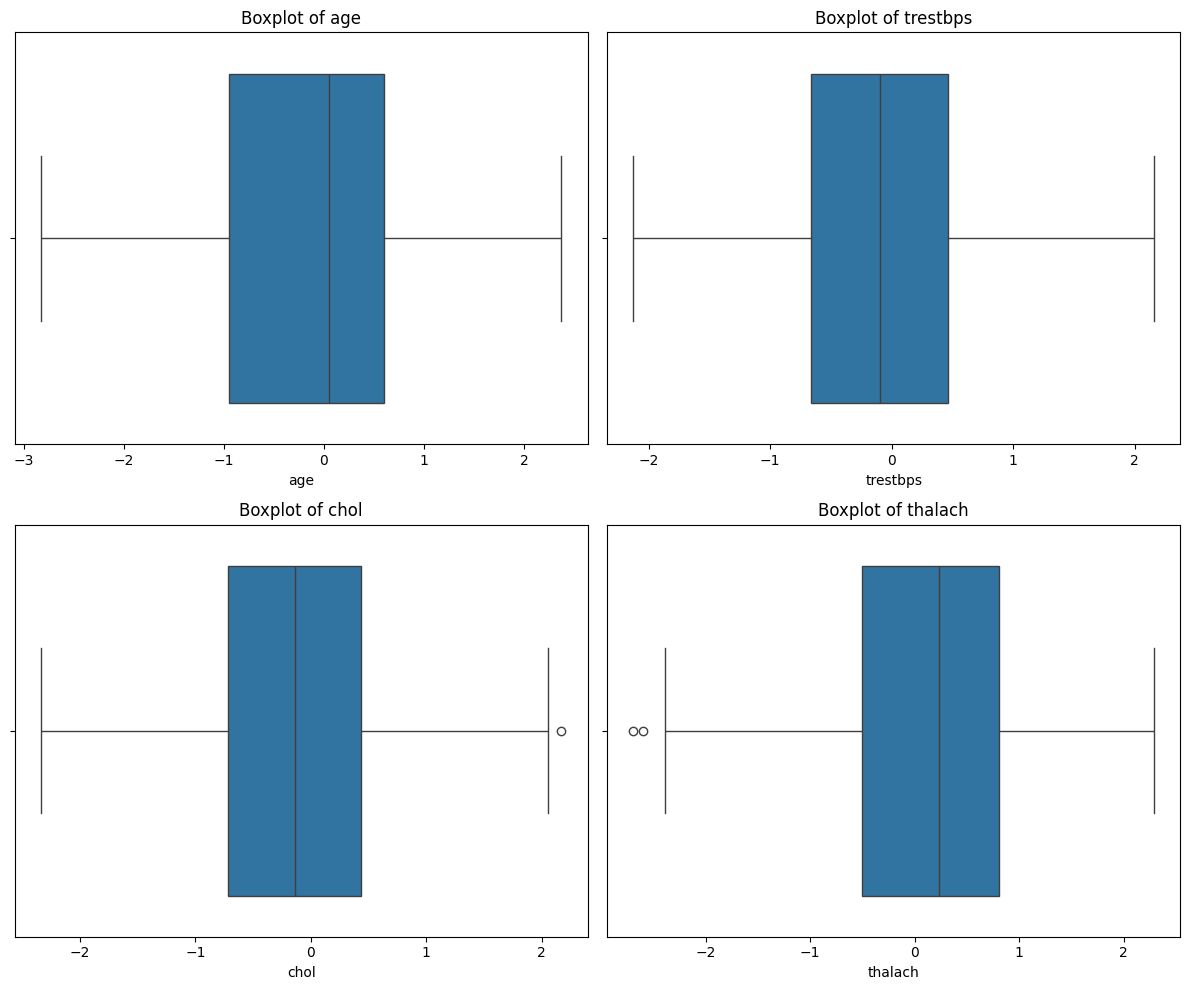

In [20]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

## Save the processed data

In [21]:
df.to_csv('../data/processed_heart_disease.csv', index=False)